<a href="https://colab.research.google.com/github/InfinityKing48/AMATH582/blob/main/582_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import numpy as np


drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/582 HW/subdata.npy'
d = np.load(data_path)

Mounted at /content/drive


In [2]:
import plotly
import plotly.graph_objs as go
from IPython.display import clear_output
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


L = 10
N_grid = 64
xx = np.linspace(-L, L, N_grid+1) 
x = xx[0:N_grid]
y = x 
z = x

K_grid = (2*np.pi/(2*L)) * np.linspace(-N_grid/2, N_grid/2-1, N_grid)

xv, yv, zv = np.meshgrid(x, y, z) 

In [3]:
sum_fft = np.zeros((N_grid, N_grid, N_grid))

for j in range(49):
  signal = np.reshape(d[:, j], (N_grid, N_grid, N_grid))
  sum_fft = sum_fft + np.fft.fftshift(np.fft.fftn(signal))

avg_fft = np.abs(sum_fft/49)
fft_max = np.int(np.max(avg_fft))
freq_sign = np.where(avg_fft > fft_max)

print(freq_sign)
print('1st frequency signature\n', 'value:', avg_fft[25, 15, 54], 
                   'Kx:', K_grid[15], 'Ky:', K_grid[25], 'Kz:', K_grid[54])
print('2nd frequency signature\n', 'value:', avg_fft[39, 49, 10], 
                   'Kx:', K_grid[49], 'Ky:', K_grid[39], 'Kz:', K_grid[10])

(array([25, 39]), array([15, 49]), array([54, 10]))
1st frequency signature
 value: 89.89652346622286 Kx: -5.340707511102648 Ky: -2.199114857512855 Kz: 6.911503837897545
2nd frequency signature
 value: 89.89652346622287 Kx: 5.340707511102648 Ky: 2.199114857512855 Kz: -6.911503837897545


In [ ]:
normal_avg_fft = np.abs(avg_fft)/np.abs(avg_fft).max()
Kx, Ky, Kz = np.meshgrid(K_grid, K_grid, K_grid)

fig_data = go.Isosurface(x = Kx.flatten(), y = Ky.flatten(), z = Kz.flatten(),
                        value = normal_avg_fft.flatten(), isomin=0.4, isomax=1)
fig = go.Figure(data = fig_data)
fig.update_layout(margin=dict(t=0, l=0, b=0))
fig.show()

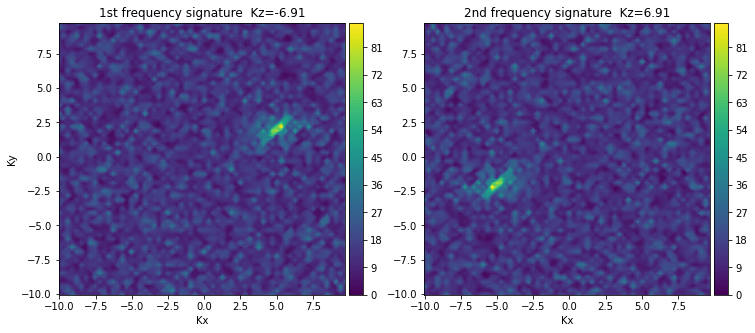

In [5]:
Kx, Ky = np.meshgrid(K_grid, K_grid)
cont_levels = np.arange(0, 90, 1)
sliced1 = avg_fft[:, :, 10]
sliced2 = avg_fft[:, :, 54]
Kz1 = round(K_grid[10], 2)
Kz2 = round(K_grid[54], 2)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

im1 = ax[0].contourf(Kx, Ky, np.abs(sliced1), cont_levels)
ax[0].set_title(f'1st frequency signature  Kz={Kz1}')
ax[0].set_xlabel('Kx')
ax[0].set_ylabel('Ky')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)

im2 = ax[1].contourf(Kx, Ky, np.abs(sliced2), cont_levels)
ax[1].set_title(f'2nd frequency signature  Kz={Kz2}')
ax[1].set_xlabel('Kx')

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax)

In [6]:
def g(x, y, z, s):
  val = np.exp(-((x**2 + y**2 + z**2) / (2*s**2)))
  return val

In [ ]:
Kx, Ky, Kz = np.meshgrid(K_grid, K_grid, K_grid)
sigma = 2
g1 = g(Kx-K_grid[49], Ky-K_grid[39], Kz-K_grid[10], sigma)

fig_data = go.Isosurface(x = Kx.flatten(), y = Ky.flatten(), z = Kz.flatten(),
                        value = g1.flatten(), isomin=0.4, isomax=1)
fig = go.Figure(data = fig_data)
fig.update_layout(margin=dict(t=0, l=0, b=0))
fig.show()

In [ ]:
Kx, Ky, Kz = np.meshgrid(K_grid, K_grid, K_grid)
sigma = 2
g2 = g(Kx-K_grid[15], Ky-K_grid[25], Kz-K_grid[54], sigma)

fig_data = go.Isosurface(x = Kx.flatten(), y = Ky.flatten(), z = Kz.flatten(),
                        value = g2.flatten(), isomin=0.4, isomax=1)
fig = go.Figure(data = fig_data)
fig.update_layout(margin=dict(t=0, l=0, b=0))
fig.show()

In [ ]:
Kx, Ky, Kz = np.meshgrid(K_grid, K_grid, K_grid)
sigma = 2
g_filter = g1 + g2

fig_data = go.Isosurface(x = Kx.flatten(), y = Ky.flatten(), z = Kz.flatten(),
                        value = g_filter.flatten(), isomin=0.4, isomax=1)
fig = go.Figure(data = fig_data)
fig.update_layout(margin=dict(t=0, l=0, b=0))
fig.show()

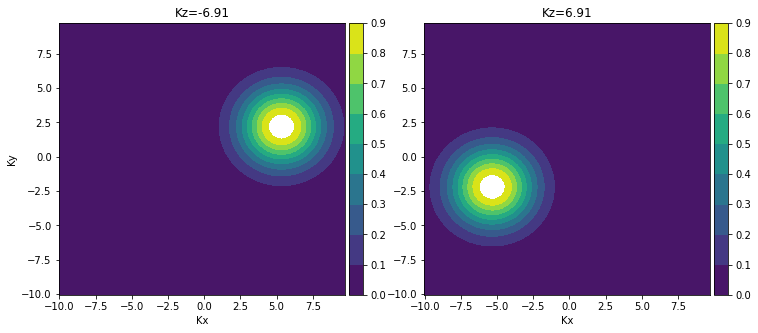

In [10]:
Kx, Ky = np.meshgrid(K_grid, K_grid)
cont_levels = np.arange(0, 1, 0.1)
sliced1 = g_filter[:, :, 10]
sliced2 = g_filter[:, :, 54]
Kz1 = round(K_grid[10], 2)
Kz2 = round(K_grid[54], 2)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

im1 = ax[0].contourf(Kx, Ky, np.abs(sliced1), cont_levels)
ax[0].set_title(f'Kz={Kz1}')
ax[0].set_xlabel('Kx')
ax[0].set_ylabel('Ky')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)

im2 = ax[1].contourf(Kx, Ky, np.abs(sliced2), cont_levels)
ax[1].set_title(f'Kz={Kz2}')
ax[1].set_xlabel('Kx')


divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax)

In [ ]:
avg_fft_denoised = avg_fft * g_filter
normal_avg_fft_denoised = np.abs(avg_fft_denoised)/np.abs(avg_fft_denoised).max()

Kx, Ky, Kz = np.meshgrid(K_grid, K_grid, K_grid)

fig_data = go.Isosurface(x = Kx.flatten(), y = Ky.flatten(), z = Kz.flatten(),
                        value = normal_avg_fft_denoised.flatten(), isomin=0.4, isomax=1)
fig = go.Figure(data = fig_data)
fig.update_layout(margin=dict(t=0, l=0, b=0))
fig.show()

In [12]:
x_pos = []
y_pos = []
z_pos = []
submarine_pos = []
signal_denoised = np.ndarray((64,64,64,49))

for j in np.arange(49):
  signal = np.reshape(d[:, j], (N_grid, N_grid, N_grid))
  fft = np.fft.fftshift(np.fft.fftn(signal))
  fft_denoised = fft * g_filter
  denoised_temp = np.real(np.fft.ifftn(np.fft.ifftshift(fft_denoised)))

  max_pos = np.unravel_index(denoised_temp.argmax(), denoised_temp.shape)

  x_pos.append(x[max_pos[1]])
  y_pos.append(y[max_pos[0]])
  z_pos.append(z[max_pos[2]])

  submarine_pos.append([x_pos[-1], y_pos[-1], z_pos[-1]])

  signal_denoised[:, :, :, j] = denoised_temp

print('final location:', submarine_pos[-1])

final location: [-5.0, 6.25, 0.9375]


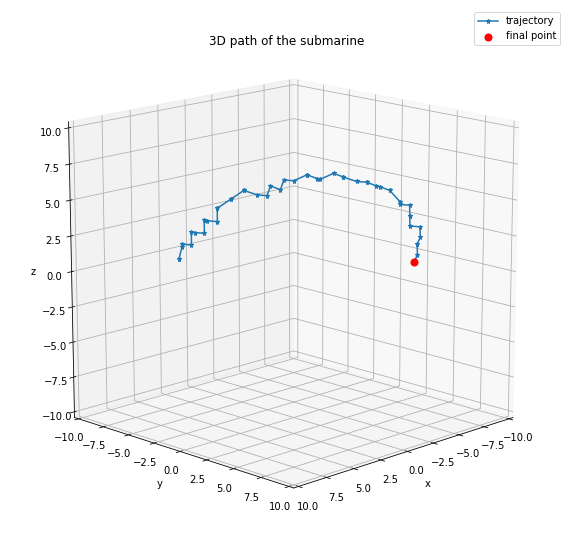

In [13]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d');
ax.plot(x_pos, y_pos, z_pos, '-*', markersize=5, label='trajectory')

ax.set_xlim(-10,+10); ax.set_ylim(-10,+10); ax.set_zlim(-10,+10)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_title('3D path of the submarine')
ax.view_init(15, 45)

ax.scatter3D(x_pos[-1], y_pos[-1], z_pos[-1], color='red', label='final point', s=50)

plt.legend()
plt.show()

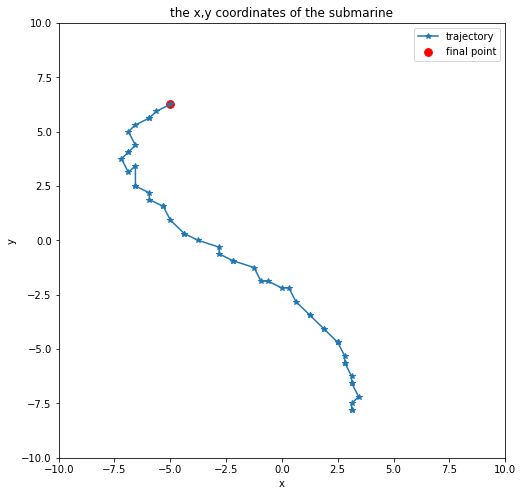

In [14]:
fig = plt.figure(figsize=(8,8))

plt.plot(x_pos, y_pos, '-*', label='trajectory')
plt.scatter(x_pos[-1], y_pos[-1], color='red', s=60, label='final point')

plt.xlim(-10,+10); plt.ylim(-10,+10)
plt.xlabel('x'); plt.ylabel('y')
plt.title('the x,y coordinates of the submarine')
plt.legend()
plt.show()